# Исследование тарифов компании "Мегалайн"

В нашем распоряжении входные данные 500 пользователей «Мегалайна» — кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

**Цель исследования** — понять, какой тариф приносит больше денег.

**Ход исследования**

Данные о пользователях получим из  5 файлов. О качестве данных известно, что, как минимум, имеется множество пропусков, поэтому понадобится обзор данных. 

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Анализ.

## Обзор данных

In [1]:
import pandas as pd # импорт библиотеки pandas
import math as mt # импорт библиотеки math
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn as sns # импорт библиотеки seaborn
import scipy.stats as st # импорт библиотеки scipy
import numpy as np # импорт библиотеки numpy
from datetime import datetime, date, time

In [2]:
calls = pd.read_csv('/Users/dianatyubeeva/Desktop/datasets/calls.csv')
internet = pd.read_csv('/Users/dianatyubeeva/Desktop/datasets/internet.csv', index_col=0)
messages = pd.read_csv('/Users/dianatyubeeva/Desktop/datasets/messages.csv')
tariffs = pd.read_csv('/Users/dianatyubeeva/Desktop/datasets/tariffs.csv')
users = pd.read_csv('/Users/dianatyubeeva/Desktop/datasets/users.csv')

Выведим на экран первые пять строк всех таблиц:

In [3]:
display(calls.head()) # получение первых 5 строк таблицы

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
display(internet.head()) # получение первых 5 строк таблицы

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [5]:
display(messages.head()) # получение первых 5 строк таблицы

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
display(tariffs.head()) # получение первых 5 строк таблицы

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [7]:
display(users.head()) # получение первых 5 строк таблицы

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Посмотрим общую информацию по всем таблицам:

In [8]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Итак, в таблицах суммарно 28 столбцов. Тип данных в столбцах — `object`, `int64`, `float64`.

Согласно документации к данным:

Таблица `users`:

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

Таблица `calls`:

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages`:

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet`:

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

Таблица `tariffs`:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


**Выводы**

Данные представляют собой полный набор критериев, предъявляемый для выбора того или иного тарифа. 

Предварительно можно утверждать, что данных достаточно для исследования, но встречаются пропуски.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

##  Предобработка данных

###  Изменение типов данных, объединение таблиц

In [13]:
#переведем столбцы с датами в нужный формат
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
#выделим отдельно столбец с месяцем
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [14]:
#по политике мегалайн каждый звонок округляется с секунды до минуты
calls['duration'] = np.ceil(calls['duration'])

Чтобы было удобней работать с данными, объединим все таблицы, где это возможно. 

Проагрегируем каждую таблицу:

In [15]:
calls_agg = calls.groupby(['user_id', 'month']).agg({'duration' : ['sum', 'count']}) #чтобы найти суммарное количество минут в мес. 
internet_agg = internet.groupby(['user_id', 'month']).sum() #чтобы нужно найти суммарное количество интернет-трафика в мес.
messages_agg = messages.groupby(['user_id', 'month']).count() #чтобы найти количество сообщений

In [16]:
calls_agg.columns = ['duration_total', 'calls_count']

In [17]:
calls_agg.head()

duration_total  calls_count
user_id month                             
1000    5               159.0           22
        6               172.0           43
        7               340.0           47
        8               408.0           52
        9               466.0           58

In [18]:
messages_agg.head()

id  message_date
user_id month                  
1000    5      22            22
        6      60            60
        7      75            75
        8      81            81
        9      57            57

In [19]:
internet_agg.head()

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

In [20]:
messages_agg.drop('id', axis = 1, inplace = True)

In [21]:
messages_agg.columns = ['messages_count']

In [22]:
data = calls_agg.merge(internet_agg, on = ('user_id', 'month'), how = 'outer')
data = data.merge(messages_agg, on = ('user_id', 'month'), how = 'outer')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1489, 12)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration_total  3174 non-null   float64
 1   calls_count     3174 non-null   float64
 2   mb_used         3203 non-null   float64
 3   messages_count  2717 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


In [24]:
#все пропуски в итоговой таблице можно считать за нули (по усл.)
for column in data.columns:
    data[column] = data[column].fillna(0)

In [25]:
#добавим столбец с гб по интернет трафику 
data['gb_used'] = data['mb_used'] / 1024

In [26]:
#т.к интернет-трафик округляется по месячно, то используем функцию np.ceil() для этого столбца
data['gb_used'] = np.ceil(data['gb_used'])

In [27]:
data.head(10)

duration_total  calls_count   mb_used  messages_count  gb_used
user_id month                                                                
1000    5               159.0         22.0   2253.49            22.0      3.0
        6               172.0         43.0  23233.77            60.0     23.0
        7               340.0         47.0  14003.64            75.0     14.0
        8               408.0         52.0  14055.93            81.0     14.0
        9               466.0         58.0  14568.91            57.0     15.0
        10              350.0         57.0  14702.49            73.0     15.0
        11              338.0         43.0  14756.47            58.0     15.0
        12              333.0         46.0   9817.61            70.0     10.0
1001    11              430.0         59.0  18429.34             0.0     18.0
        12              414.0         63.0  14036.66             0.0     14.0

In [28]:
data = data.reset_index()

In [29]:
data = data.merge(users, on = 'user_id', how = 'outer')

In [30]:
#все пропуски в итоговой таблице можно считать за нули (по усл.)
for column in data.columns:
    if column not in ['churn_date','reg_date']:
        data[column] = data[column].fillna(0)

In [31]:
#переведем все столбцы к целым числам
for column in data.columns:
    if column not in ['churn_date', 'city', 'first_name',
       'last_name', 'reg_date', 'tariff']:
        data[column] = data[column].astype(int)

In [32]:
data.head(3)

,user_id,month,duration_total,calls_count,mb_used,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,159,22,2253,22,3,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,172,43,23233,60,23,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,340,47,14003,75,14,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         3216 non-null   int64 
 1   month           3216 non-null   int64 
 2   duration_total  3216 non-null   int64 
 3   calls_count     3216 non-null   int64 
 4   mb_used         3216 non-null   int64 
 5   messages_count  3216 non-null   int64 
 6   gb_used         3216 non-null   int64 
 7   age             3216 non-null   int64 
 8   churn_date      189 non-null    object
 9   city            3216 non-null   object
 10  first_name      3216 non-null   object
 11  last_name       3216 non-null   object
 12  reg_date        3216 non-null   object
 13  tariff          3216 non-null   object
dtypes: int64(8), object(6)
memory usage: 376.9+ KB


In [34]:
#переведем столбцы с датами в нужный формат
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

data['reg_date'] = pd.to_datetime(data['reg_date'], format='%Y-%m-%d')
data['churn_date'] = pd.to_datetime(data['churn_date'], format='%Y-%m-%d')

###  Проверка на аномалии и дубликаты

#### Определение и удаление дубликатов

##### Неявные дубликаты

Как правило, неявные дубликаты скрываются в данных с типом `object`. После обработки данных остался лишь один из исходных столбцов с таким типом - `city` (можно еще рассмотреть столбцы `last_name` и  `first_name`, но они никак не повлияют на исследование).

In [35]:
data['city'].sort_values().unique() # Просмотр уникальных значений 

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Неяных дубликатов не было найдено. 

##### Явные дубликаты

In [36]:
data.duplicated().sum() #подсчет явных дубликатов

0

Явных дубликатов также не оказалось.

#### Аномальность данных

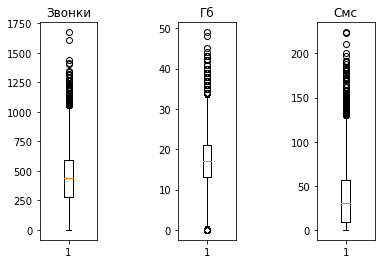

In [37]:
fig = plt.figure()

ax_1 = fig.add_subplot(1, 5, 1)
ax_2 = fig.add_subplot(1, 5, 3)
ax_3 = fig.add_subplot(1, 5, 5)

ax_1.boxplot(data['duration_total']);
ax_1.set_title('Звонки');
ax_2.boxplot(data['gb_used']);
ax_2.set_title('Гб');
ax_3.boxplot(data['messages_count']);
ax_3.set_title('Смс');

Аномальные значения присутствуют, но они соизмеримы с реальностью, поэтому ограничивать выборки не будем.

###  Расчет месячной выручки с каждого пользователя 

Посчитаем выручку с каждого пользователя:

In [38]:
#напишем функцию, которая будет считать выручку для каждого пользователя
def income_for_user(row):
    
    income_for_user = 0
    #считаем разницу между доступным траффиком и использованным 
    fee_for_calls = row['duration_total'] - tariffs[tariffs['tariff_name'] == row['tariff']]['minutes_included']
    fee_for_mess = row['messages_count'] - tariffs[tariffs['tariff_name'] == row['tariff']]['messages_included']
    fee_for_gb = np.ceil((row['mb_used'] - tariffs[tariffs['tariff_name'] == row['tariff']]['mb_per_month_included']) / 1024)

    #считаем сколько переплатили, включая абонентскую плату 
    if (fee_for_calls >= 0).all() and (fee_for_mess >= 0).all() and (fee_for_gb >= 0).all():
        income_for_user += (fee_for_calls * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_minute']
                           +  fee_for_mess * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_message'] + fee_for_gb * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_gb']
                            + tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee'])
        
    elif (fee_for_calls >= 0).all() and (fee_for_mess <= 0).all() and (fee_for_gb >= 0).all():
        income_for_user += (fee_for_calls * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_minute']
                           +  fee_for_gb * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_gb']
                           + tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee'])
        
    elif (fee_for_calls >= 0).all() and (fee_for_mess >= 0).all() and (fee_for_gb <= 0).all():
        income_for_user += (fee_for_calls * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_minute']
                           +  fee_for_mess * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_message'] 
                            + tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee'])
        
    elif (fee_for_calls <= 0).all() and (fee_for_mess >= 0).all() and (fee_for_gb >= 0).all():
        income_for_user += (fee_for_mess * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_message'] 
                            + fee_for_gb * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_gb']
                            + tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee'])
        
    elif (fee_for_calls >= 0).all() and (fee_for_mess <= 0).all() and (fee_for_gb <= 0).all():
        income_for_user += (fee_for_calls * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_minute']
                           + tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee'])
        
    elif (fee_for_calls <= 0).all() and (fee_for_mess >= 0).all() and (fee_for_gb <= 0).all():
        income_for_user += (fee_for_mess * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_message']
                           + tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee'])
    
    elif (fee_for_calls >= 0).all() and (fee_for_mess <= 0).all() and (fee_for_gb <= 0).all():
        income_for_user += (fee_for_calls * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_minute']
                           + tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee'])
    
    elif (fee_for_calls <= 0).all() and (fee_for_mess <= 0).all() and (fee_for_gb >= 0).all():
        income_for_user += (fee_for_gb * tariffs[tariffs['tariff_name'] == row['tariff']]['rub_per_gb']
                           + tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee'])    
    else:
        income_for_user += tariffs[tariffs['tariff_name'] == row['tariff']]['rub_monthly_fee']
        
    row['income_for_user'] = income_for_user
    return row 
    

In [39]:
#применим функцию к таблице и посмотрим что получилось 
data = data.apply(income_for_user, axis = 1)
for i in data.index:
    data.loc[i, 'income_for_user'] = int(data['income_for_user'][i])
data['income_for_user'] = data['income_for_user'].astype(int)
data.head()

,user_id,month,duration_total,calls_count,mb_used,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,income_for_user
0,1000,5,159,22,2253,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
1,1000,6,172,43,23233,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
2,1000,7,340,47,14003,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
3,1000,8,408,52,14055,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
4,1000,9,466,58,14568,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950


In [40]:
# check
data['income_for_user'].sum()

4916951

In [41]:
# check
data[data['user_id'] == 1499][['user_id', 'duration_total', 'calls_count', 'mb_used', 'messages_count',
       'gb_used',  'city', 'reg_date', 'tariff', 'income_for_user']]

,user_id,duration_total,calls_count,mb_used,messages_count,gb_used,city,reg_date,tariff,income_for_user
3172,1499,70,9,1845,11,2,Пермь,2018-09-27,smart,550
3173,1499,449,68,17788,48,18,Пермь,2018-09-27,smart,1150
3174,1499,612,74,17963,59,18,Пермь,2018-09-27,smart,1513
3175,1499,492,69,13055,66,13,Пермь,2018-09-27,smart,598


In [42]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   user_id          3216 non-null   int64         
 1   month            3216 non-null   int64         
 2   duration_total   3216 non-null   int64         
 3   calls_count      3216 non-null   int64         
 4   mb_used          3216 non-null   int64         
 5   messages_count   3216 non-null   int64         
 6   gb_used          3216 non-null   int64         
 7   age              3216 non-null   int64         
 8   churn_date       189 non-null    datetime64[ns]
 9   city             3216 non-null   object        
 10  first_name       3216 non-null   object        
 11  last_name        3216 non-null   object        
 12  reg_date         3216 non-null   datetime64[ns]
 13  tariff           3216 non-null   object        
 14  income_for_user  3216 non-null   int64  

##  Анализ и описание данных

###  Изучение поведения клиентов

####  Средний заработок с тариффа за месяц и год

Определим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц:

In [43]:
#создадим сводную таблицу, где просчитаем медиану использованного трафика за месяц 
svot_tariff = data.pivot_table(index = 'tariff', 
                                    values = ['duration_total', 'mb_used', 'messages_count', 'income_for_user'],
                                   aggfunc = ['median'])
svot_tariff.columns = ['duration_total','income_for_user','mb_used','messages_count']

<AxesSubplot:xlabel='tariff'>

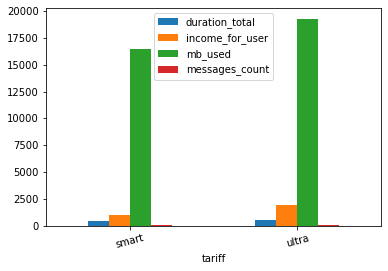

In [44]:
#изобразим группировку по тариффам через график
svot_tariff.plot(kind='bar', rot=15)

По графику можем заметим, что в среднем больше трафика используется клиентами тарифа "Ультра" и  он же приносит больше выручки в месяц. 

Посмотрим, какой тариф принес больше денег за весь год и сколько:

In [45]:
#делаем срезы по траффику
smart = data.query('tariff == "smart"')
ultra = data.query('tariff == "ultra"')

In [46]:
one_user_sm = sum(smart['income_for_user']) / len(smart['user_id'].unique())
one_user_ult = sum(ultra['income_for_user']) /  len(ultra['user_id'].unique())
print(f'Выручка на одного пользователя по тарифу "Смарт" : {int(one_user_sm)}')
print(f'Выручка на одного пользователя по тарифу "Ультра" : {int(one_user_ult)}')

Выручка на одного пользователя по тарифу "Смарт" : 8193
Выручка на одного пользователя по тарифу "Ультра" : 13698


In [47]:
all_people = len(smart['user_id'].unique()) / len(data['user_id'].unique())
print(f'Количество клиентов по тарифу "Смарт" : {int(all_people*100)}%')

Количество клиентов по тарифу "Смарт" : 70%


Хочется отметить, что в целом тариф "Смарт" дешевле по условия, чем "Ультра", однако, клиентов у него больше, но выручки меньше. 

Также важно понять, что в целом израсходованный трафик в месяц больше у тарифа "Ультра" (см. график по svot_tariff), но у него меньше пользователей. В связи с этим, возможно стоит провести доп. реклам. компанию для этого тарифа.



**Итоговые наблюдения**:
- Клиентной базы у тариффа "Смарт" больше: 70% от всего числа пользователей 
- Выручка на одного пользователя по тариффу "Ультра" превышает тарифф "Смарт" в 1,5 раза
- Интернет-сессии более востребованы у тариффа "Ультра"

####  Средний заработок с тариффа по городам 

Посмотрим в каких регионах какой из тарифов больше используется и где больше выручка в месяц:

In [48]:
#создадим свод. таблицу с группировкой по городам
city_svot_money = data.pivot_table(index='city', columns = 'tariff' ,values = 'income_for_user').fillna(0)

In [49]:
#разделим таблицу по тарифу и переименуем столбцы
city_svot_smart = city_svot_money.drop(columns = ['ultra'],axis = 1)
city_svot_ultra = city_svot_money.drop(columns = ['smart'],axis = 1)
city_svot_smart.columns = ['income_for_user']
city_svot_ultra.columns = ['income_for_user']

In [50]:
#сделаем сортировку по возрастанию, чтобы определить "топов" по выручке компании 
city_svot_smart = city_svot_smart.sort_values(by = 'income_for_user', ascending=False).head(10)
city_svot_ultra = city_svot_ultra.sort_values(by = 'income_for_user', ascending=False).head(10)

<BarContainer object of 10 artists>

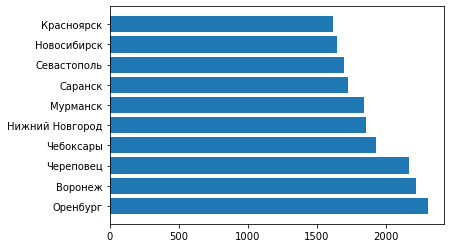

In [51]:
plt.barh(city_svot_smart.index, city_svot_smart['income_for_user'])

<BarContainer object of 10 artists>

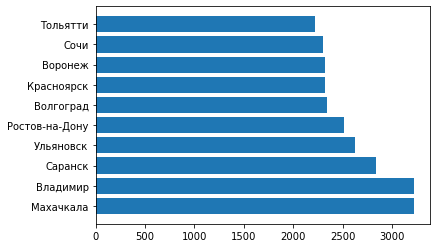

In [52]:
plt.barh(city_svot_ultra.index, city_svot_ultra['income_for_user'])

Получается топ-1 в тарифах занимают: Оренбург, Владимир и Махачкала. Воронеж, который занимает почти последнюю строку с выручкой по тарифу "Ультра", находится на 2м месте в "Смарте".

Но где же все-таки больше пользователей? Давайте посмотрим, сделав еще одну сводную таблицу. 

In [53]:
city_svot_users = users.pivot_table(index='city', columns = 'tariff' ,values = 'user_id', aggfunc = 'count').fillna(0)

city_svot_users_smart = city_svot_users.drop(columns = ['ultra'],axis = 1)
city_svot_users_ultra = city_svot_users.drop(columns = ['smart'],axis = 1)

city_svot_users_smart.columns = ['user_id_count']
city_svot_users_ultra.columns = ['user_id_count']

city_svot_users_smart = city_svot_users_smart.sort_values(by = 'user_id_count', ascending=False).head(10)
city_svot_users_ultra = city_svot_users_ultra.sort_values(by = 'user_id_count', ascending=False).head(10)

<BarContainer object of 10 artists>

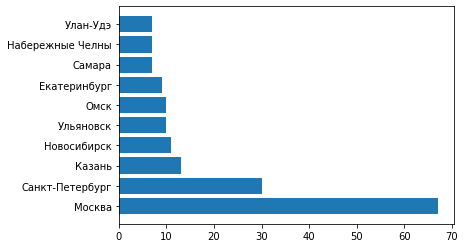

In [54]:
plt.barh(city_svot_users_smart.index, city_svot_users_smart['user_id_count'])

<BarContainer object of 10 artists>

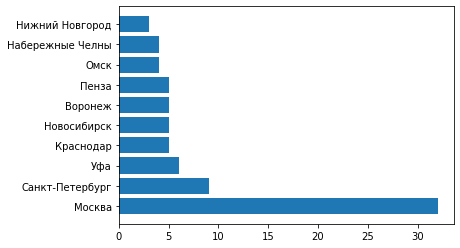

In [55]:
plt.barh(city_svot_users_ultra.index, city_svot_users_ultra['user_id_count'])

Москва занимает топ-1 в обеих таблицах (тариф "Смарт" здесь имеет больше клиентов), однако, в таблицах с выручкой этого города нет. Посмотрим, на количество израсходанного трафика в месяц в Москве и ост. регионах. 

In [56]:
svot_tariff_mosc = data.query('city == "Москва"').pivot_table(index = 'tariff', 
                                    values = ['duration_total', 'mb_used', 'messages_count', 'income_for_user'],
                                   aggfunc = ['median'])
svot_tariff_mosc.columns = ['duration_total','income_for_user','mb_used','messages_count']


svot_tariff_no_mosc = data.query('city != "Москва"').pivot_table(index = 'tariff', 
                                    values = ['duration_total', 'mb_used', 'messages_count', 'income_for_user'],
                                   aggfunc = ['median'])
svot_tariff_no_mosc.columns = ['duration_total','income_for_user','mb_used','messages_count']

Text(0, 0.5, 'Величина трафика')

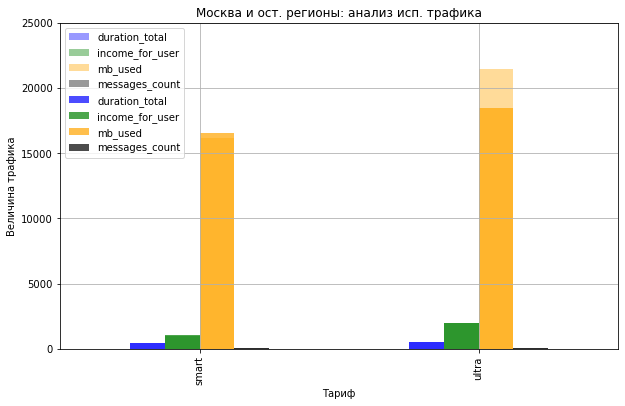

In [57]:
#объединим два графика на одном поле
axes = svot_tariff_mosc.plot(
    kind='bar',
    grid=True,
    figsize=(10, 6),
    alpha=0.4,
    ylim=(0, 25000),
    xlim=(0, 1000),
    color=['blue', 'green', 'orange', 'black']
)

svot_tariff_no_mosc.plot(
    kind='bar',
    grid=True,
    figsize=(10, 6),
    alpha=0.7,
    ylim=(0, 25000),
    xlim=(0, 1000),
     color=['blue', 'green', 'orange', 'black'],
    ax = axes
)

plt.title('Москва и ост. регионы: анализ исп. трафика')
plt.xlabel('Тариф')
plt.ylabel('Величина трафика')

Можем заметить колоссальную разницу между Москвой и ост. городами по интернет-трафику, особенно в тарифе "Ультра". Однако, по другим показателям все более-менее одинаково. Нельзя забывать, что перед нами средние величины. Вполне возможно, что трафик на одного пользователя распределяется иначе, чем в ост. городах, которые приносят деньги компании.  

**Итоговые наблюдения**:
- Больше всего выручки компании приносят следующие города:
    - Тарифф "Смарт": Оренбург, Воронеж (около 2,2к)
    - Тарифф "Ультра": Махачкала, Владимир (около 3,2к)
- Москва лидирует в количестве пользователей в обоих тариффах
- В Москве используется интрнет-сессии. в среднем больше, чем в других регионах 

####  Изучение клиентов разных возрастных групп

Кроме информации о городах нам также известен возраст клиентов. Определим возрастную категорию, которая приносит наибольшую выручку в компанию. 

In [58]:
#определим возрастную аудиторию компании
old_one = users['age'].unique().max()
young_one = users['age'].unique().min()
print(f'Возрастная аудитория компании: {young_one}-{old_one}')

Возрастная аудитория компании: 18-75


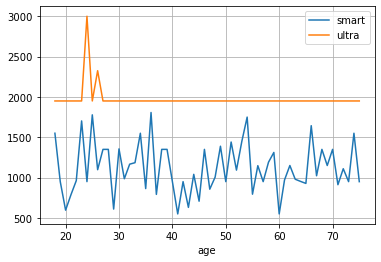

In [59]:
age_income = smart.groupby('age')['income_for_user'].median().plot(grid=True, label='smart')
ultra.groupby('age')['income_for_user'].median().plot(grid=True, ax = age_income, label='ultra')
plt.legend()

Для тарифа "Ультра" наиболее прибыльными считаются люди в возрасте 20-30. Причем последние приносят большую выручку, чем те же люди возратсной категории тарифа "Смарт". Однако хоть тариф "Ультра" и имеет такие резкие пики, график тарифа "Смарт" в среднем ниже. 

Сделаем категоризацию данных и посмотрим чем больше пользуются клиенты разных возрастов:

In [60]:
#создадим функцию, которая принимает в качестве аргумента значения колонки total_area
def age_group(row):
    group = row['age']
    #через условные операторы разобьем на категории
    if group <= 25:
        return 'Молодежь'
    elif group >= 26 and group <= 44:
        return 'Средний возраст'
    else:
        return 'Пожилой возраст'
data['age_group'] = data.apply(age_group, axis=1)
display(data.head())

,user_id,month,duration_total,calls_count,mb_used,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,income_for_user,age_group
0,1000,5,159,22,2253,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,Пожилой возраст
1,1000,6,172,43,23233,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,Пожилой возраст
2,1000,7,340,47,14003,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,Пожилой возраст
3,1000,8,408,52,14055,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,Пожилой возраст
4,1000,9,466,58,14568,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950,Пожилой возраст


In [61]:
young = data.query('age_group == "Молодежь"')
middle = data.query('age_group == "Средний возраст"')
old = data.query('age_group == "Пожилой возраст"')

In [62]:
age = data.groupby('age_group').agg({'duration_total' : ['median'], 
                                    'messages_count' : ['median'],
                                    'gb_used' : ['median'],
                                    'income_for_user' : ['median']})
age.columns = ['duration_total', 'messages_count', 'gb_used', 'income_for_user']

In [63]:
age

,duration_total,messages_count,gb_used,income_for_user
age_group,,,,
Молодежь,396.0,29.0,17.0,1724.0
Пожилой возраст,459.0,32.0,17.0,1550.5
Средний возраст,430.0,28.0,17.0,1750.0


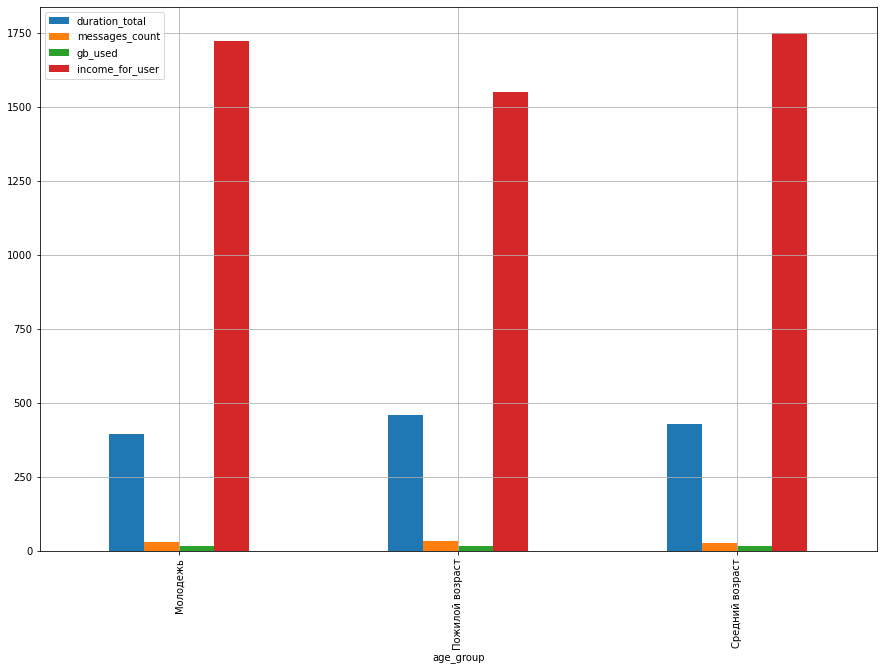

In [64]:
age.plot(kind='bar', figsize=(15,10), grid=True);

Пожилые люди больше ост. категорий используют звонки и смс. Молодежь же меньше всего пользуется минутами. Средний возраст в большей степени, чем молодежь пользуется звонками. Однако, выручки компании больше приносит именно средний возраст, значит и суммарно траффика потребляют больше других. 

**Итоговые наблюдения**:
- Больше всего выручки компании приносят следующие возраст. группы:
    - Молодежь (около 1,72к в мес.)
    - Средний возраст (около 1,75к в мес.)
- Пожилые люди больше ост. категорий используют звонки и смс, молодежь же меньше всего пользуется минутами
- Тариф "Ультра" в среднем по всем возрастам по доходу превышает тариф "Смарт"

####  Изучение отказов от пользования тариффом

In [65]:
#создадим копию датафрейма для будущих манипуляций)
data_time = data.copy(deep=True)

Последнее, что рассмотрим - отток клиентов в разные месяцы 2018 года. 

In [66]:
#заполним пропуски так, чтоб отсутствие даты являлось - 0 (т.е продолжение использование тариффа)
#1 - прекращение пользования тариффом
users['churn_date'] = users['churn_date'].fillna(0)
data['churn_date'] = data['churn_date'].fillna(0)
for i in users.index:
    if users.loc[i, 'churn_date'] != 0:
        users.loc[i, 'churn_date'] = 1
for i in data.index:
    if data.loc[i, 'churn_date'] != 0:
        data.loc[i, 'churn_date'] = 1

In [67]:
#переведем наши 1 и 0 к булевым переменным
users['churn_date'] = users['churn_date'].astype(bool)
data['churn_date'] = data['churn_date'].astype(bool)

In [68]:
smart = users.query('tariff == "smart"')
ultra = users.query('tariff == "ultra"')

Text(0.5, 1.0, 'Распределение оттока клиентов по тарифам')

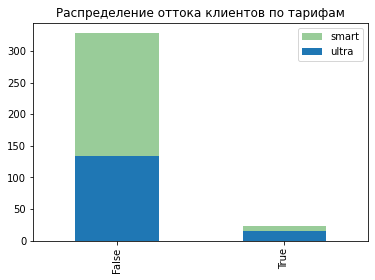

In [69]:
churn = smart['churn_date'].value_counts().plot(kind='bar', label='smart', color = 'green', alpha = 0.4)
ultra['churn_date'].value_counts().plot(kind='bar', label='ultra')
plt.legend()
plt.title('Распределение оттока клиентов по тарифам')

Определим долю отказов клиентов от тарифов и сравним:

In [70]:
smart_part = len(smart.query('churn_date == 1')) / len(smart['user_id']) * 100
ultra_part = len(ultra.query('churn_date == 1')) / len(ultra['user_id']) * 100
print(f'Доля отказов от тарифа "Смарт" : {int(smart_part)}%')
print(f'Доля отказов от тарифа "Ультра" : {int(ultra_part)}%')

Доля отказов от тарифа "Смарт" : 6%
Доля отказов от тарифа "Ультра" : 10%


Кажется, что по графику от тарифа "Смарт" отказывается большее кол-во людей, однако, если просчитать доли отказов от тарифа, выяснится, что тариф "Ультра" теряет больше клиентов в процентном соотношении. 

Почему же клиенты отказались от услуг компании? Обратимся к следующему графику:

In [71]:
smart = data.query('tariff == "smart"')
ultra = data.query('tariff == "ultra"')

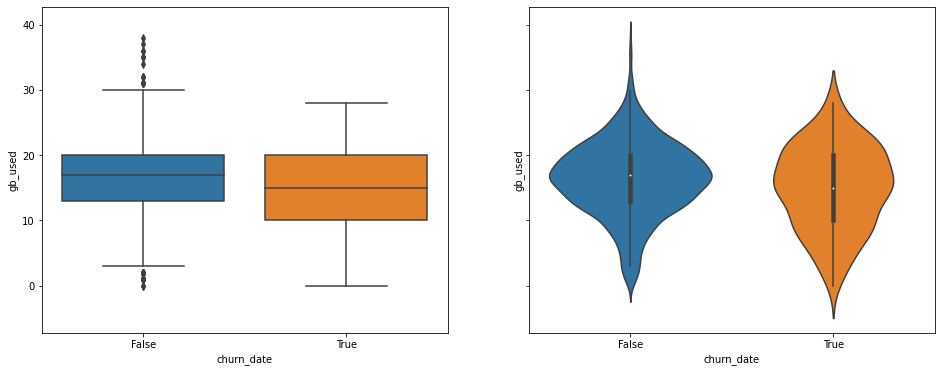

In [72]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.boxplot(x='churn_date', y='gb_used', data=smart, ax=axes[0]);
sns.violinplot(x='churn_date', y='gb_used', data=smart, ax=axes[1]);


В тарифе "Смарт" интернет-трафик почти не различается в случаях ухода клиента и наоборот. Сам факт большого использования интернет-трафика ушедшими клиентами наводит на мысли о каких-то проблемах связанных с этим показателем. Возможно, высокая стоимость или какие-то неполадки внутри системы. 

<AxesSubplot:xlabel='churn_date', ylabel='gb_used'>

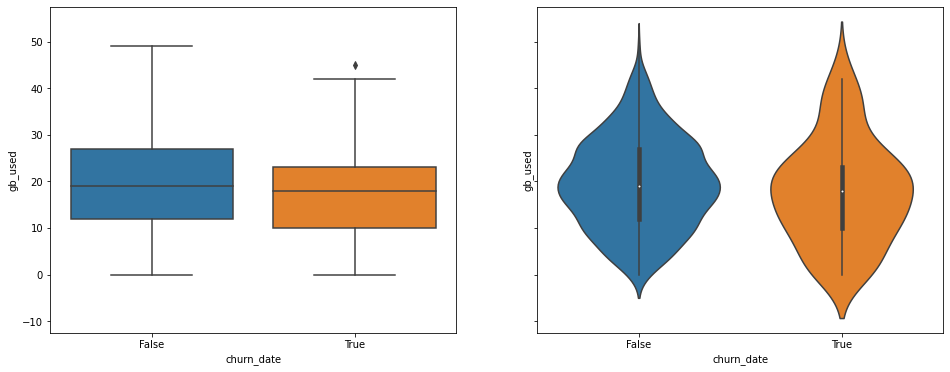

In [73]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))
sns.boxplot(x='churn_date', y='gb_used', data=ultra, ax=axes[0])
sns.violinplot(x='churn_date', y='gb_used', data=ultra, ax=axes[1])

В тарифе "Ультра" все наоборот. Отток, скорее всего, в данном тарифе не связан с интернет-трафиком. 

#####  Средняя длительность пользования тариффом по различ. группировкам

In [74]:
#для исследования в этом блоке нам интересны только пользователи, которые 
#прекратили ипсользовать тарифф
data_time.dropna(subset=['churn_date'], inplace=True)

In [75]:
#чтобы использовать функцию ниже, переведем даты снова в формат str
data_time['churn_date'] = data_time['churn_date'].astype(str)
data_time['reg_date'] = data_time['reg_date'].astype(str)

In [76]:
def time_using(row):
    #заявим переменную
    time_using = 0
    #переведем даты обратны в прежний формат
    time_1 = datetime.strptime(row['reg_date'],"%Y-%m-%d")
    time_2 = datetime.strptime(row['churn_date'],"%Y-%m-%d")
    #найдем разницу между двумя датами 
    time_interval = time_2 - time_1
    #переведем разницу исключительно в дни
    time_using += time_interval.days
    row['time_using'] = time_using
    return row 
    

In [77]:
data_time = data_time.apply(time_using, axis = 1)

In [78]:
#создадим таблицу где будет отображаться каждый клиент без привязки к месяцам 
data_time_for_user = (
    data_time
    .groupby('user_id').agg({'city' : ['first'], 
                             'time_using' : ['first'], 
                             'age' : ['first'],
                            'tariff' : ['first'],
                            'age_group' : ['first']})
)

In [79]:
data_time_for_user.columns = ['city', 'time_using', 'age', 'tariff', 'age_group']

In [80]:
data_time_for_user.head()

,city,time_using,age,tariff,age_group
user_id,,,,,
1019,Томск,142,63,ultra,Пожилой возраст
1020,Чита,57,59,smart,Пожилой возраст
1034,Вологда,87,66,smart,Пожилой возраст
1050,Тюмень,109,44,ultra,Средний возраст
1051,Москва,139,37,smart,Средний возраст


In [81]:
#сделаем срезы по тариффам
smart_time = data_time_for_user.query('tariff == "smart"')
ultra_time = data_time_for_user.query('tariff == "ultra"')

**Группировка по городам**:

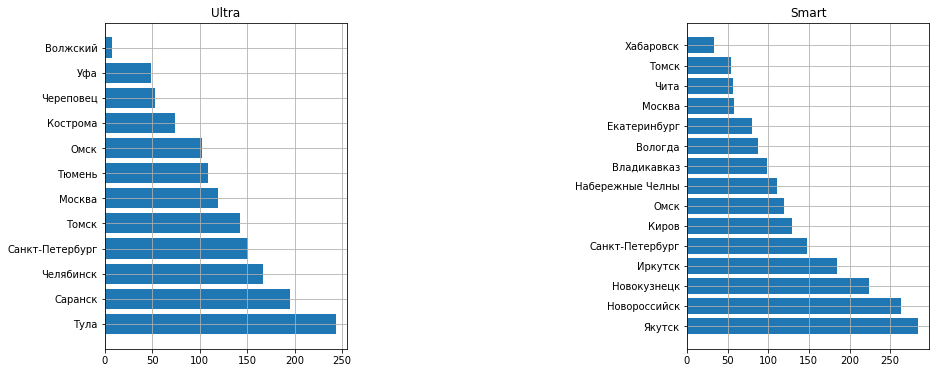

In [82]:
#обозначим на одном поле 
fig = plt.figure(figsize=(20,6))

ax_1 = fig.add_subplot(1, 4, 1)
ax_2 = fig.add_subplot(1, 4, 3)

ax_1.barh(ultra_time.groupby('city')['time_using'].median().sort_values(ascending=False).index,
          ultra_time.groupby('city')['time_using'].median().sort_values(ascending=False), 
          label='time_using_ult')
ax_1.set_title('Ultra');
ax_2.barh(smart_time.groupby('city')['time_using'].median().sort_values(ascending=False).index, 
          smart_time.groupby('city')['time_using'].median().sort_values(ascending=False),
          label='time_using_sm')
ax_2.set_title('Smart');

ax_1.grid()
ax_2.grid()

"Быстрые" города по оттоку по тарифам: Волжский и Хабаровск, то есть минимальные по длительности использования. В случае г. Волжский можно предположить, что отказ связан с условиями тарифа, ибо по времени прошло меньше месяца (около недели). Г. Хабаровск, скорее всего, имеет другие причины, ибо пользование в 33 дня, что означает двойную оплату за тариф, может подразумевать под собой какие-то проблемы с трафиком на 2й месяц использования. 

**Группировка по возрасту**:

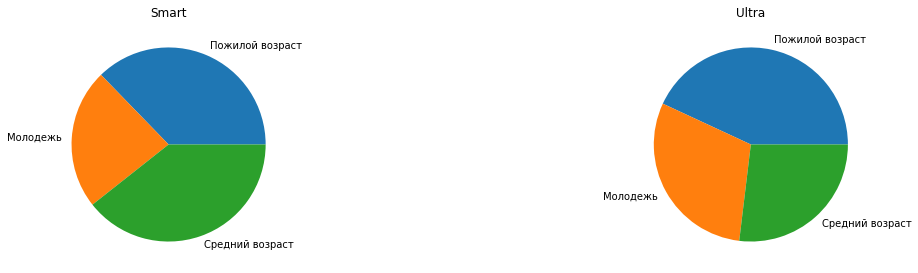

In [83]:
fig = plt.figure(figsize=(20,6))

ax_1 = fig.add_subplot(1, 4, 1)
ax_2 = fig.add_subplot(1, 4, 3)

labels = ["Пожилой возраст", "Молодежь", "Средний возраст"]
ax_1.pie([smart_time.groupby('age_group')['time_using'].median()['Пожилой возраст'], 
         smart_time.groupby('age_group')['time_using'].median()['Молодежь'], 
         smart_time.groupby('age_group')['time_using'].median()['Средний возраст']], 
       labels=labels);
ax_1.set_title('Smart');

ax_2.pie([ultra_time.groupby('age_group')['time_using'].median()['Пожилой возраст'], 
         ultra_time.groupby('age_group')['time_using'].median()['Молодежь'], 
         ultra_time.groupby('age_group')['time_using'].median()['Средний возраст']], 
       labels=labels);
ax_2.set_title('Ultra');

От "Смарта" в среднем реже отказывались люди среднего возраста, а быстрее - молодежь. В тарифе "Ультра" наоборот: пожилой возраст дольше использовал услуги компании, а быстро отказывались от них люди среднего возраста. 

**Итоговые наблюдения**:
- Тариф "Ультра" теряет больше клиентов в процентном соотношении (10% от всех пользователей тариффа)
- В тарифе "Смарт" интернет-трафик почти не различается в случаях ухода клиента и наоборот. Сам факт большого использования интернет-трафика ушедшими клиентами наводит на мысли о каких-то проблемах связанных с этим показателем 
- "Быстрые" города по оттоку по тариффам: Волжский ("Ультра") и Хабаровск ("Смарт")
- От "Смарта" в среднем реже отказывались люди среднего возраста, а быстрее - молодежь. В тарифе "Ультра" наоборот: пожилой возраст дольше использовал услуги компании, а быстро отказывались от них люди среднего возраста

###  Исследование распределений параметров

Оценим и сравним распределения параметров разных тарифов:

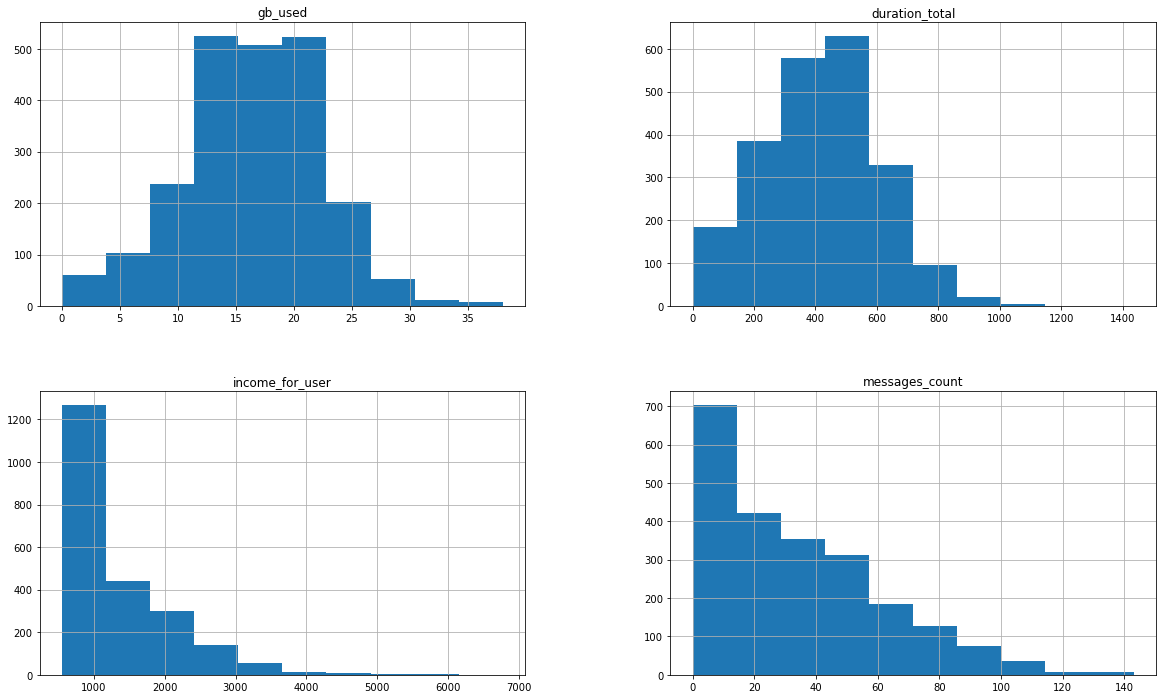

In [84]:
#оценим распределения параметров трафика и величины выручек за месяц
features = list(set(smart.columns) - set(['user_id', 'mb_used', 'calls_count', 'age', 'reg_date', 'month']))

smart[features].hist(figsize=(20,12));

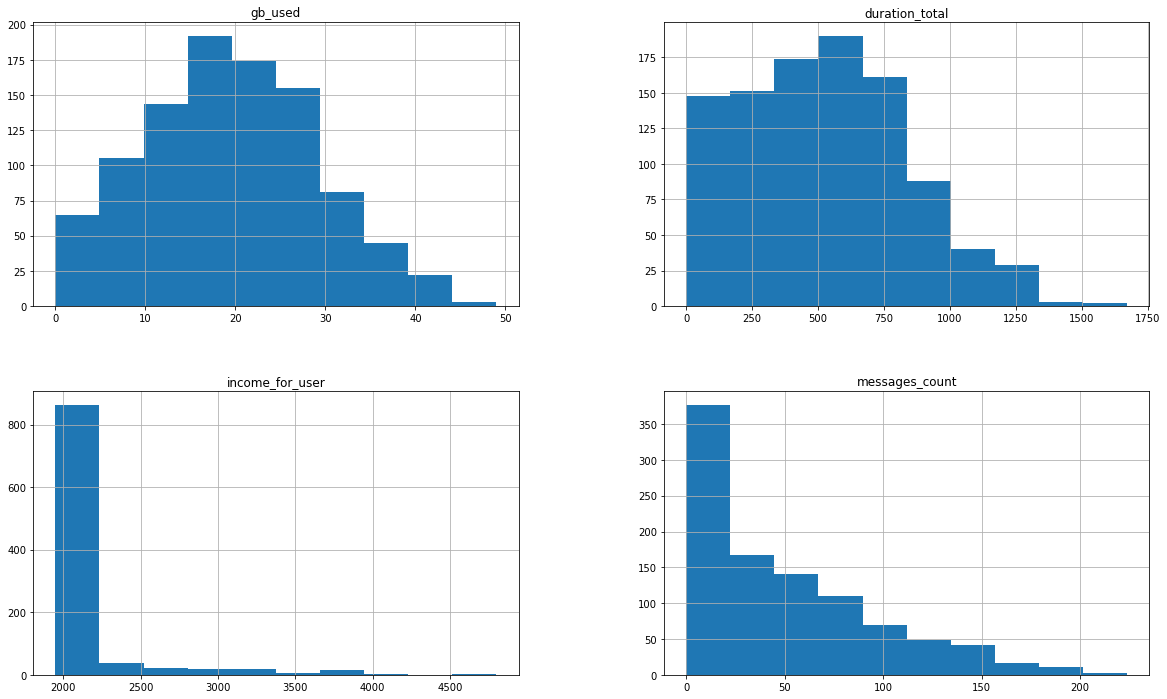

In [85]:
features = list(set(ultra.columns) - set(['user_id', 'mb_used', 'calls_count', 'age', 'reg_date', 'month']))

ultra[features].hist(figsize=(20,12));

`gb_used`

Распределение в тарифе "Ультра" очень близко к нормальному, в то время как в тарифе "Смарт" распределение имеет слегка левостороннюю ассиметрию.

`messages_count`,`income_for_user`

Все распределения (вне зависимости от тарифа) относятся к распределениям с правосторонними ассиметриями. Отличаются лишь областью опредления и ее многозначностью. 

`duration_total`

Распределение в тарифе "Смарт" очень близко к нормальному, в то время как в тарифе "Ультра" распределение имеет слегка левостороннюю ассиметрию.

Подробнее об этом мы можем посмотреть через описательную статистику:

In [86]:
(
    data
         .pivot_table(index = 'tariff', values = ['duration_total', 'messages_count',
       'gb_used',  'income_for_user'], 
                                                                  aggfunc = ['mean','median'])
        
        .rename(columns = {'messages_count':'sms', 'duration_total':'calls', 'gb_used':'gb', 'income_for_user':'revenue'})
        .style.format("  {:,.1f}")
)

In [87]:
(
    data
         .pivot_table(index = 'tariff', values = ['duration_total', 'messages_count',
       'gb_used',  'income_for_user'], 
                                                                  aggfunc = [ 'std', 'var'])
        .rename(columns = {'messages_count':'sms', 'duration_total':'calls', 'gb_used':'gb', 'income_for_user':'revenue'})
        .style.format("  {:,.1f}")
)

Заметим, что везде кроме `gb_used` и `duration_total` медиана меньше среднего арифметического. То есть распределения и правда правосторонние, однако, `gb_used` и `duration_total` наоборот - левостороннее. 

Перейдем к тарифу "Ультра":

Утверждение о нормальности распределения `gb_used` в тарифе "Ультра" также подтвердилось. Медиана и сред. арифметическое почти совпадают. 

**Итоговые наблюдения**:
- В тариффе "Смарт" : везде кроме gb_used и duration_total медиана меньше среднего арифметического. То есть распределения и правда правосторонние, однако, gb_used и duration_total наоборот - левостороннее
- В тариффе "Ультра" : все тоже самое, но gb_used и duration_total близки к нормальному распределению


##  Проверка гипотез

###  Гипотеза 1

Проверить : *средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются*

Предлагаю проверить альтернативную гипотезу о равенстве средних и, далее, найти вероятность обратного. Поэтому сформулируем гипотезу следующих образом:

Н0 : μх = μy

Н1 : μх ≠ μy

т.е:

Н0 : средняя выручка пользователей тарифов совпадает

Н1 : средняя выручка пользователей тарифов не совпадает

Для проверки будем использовать ttest_ind, ибо выборки независимы, а дисперсии (см. стат. таблицы) не равны. 

In [88]:
#делаем срезы по столбцу в таблицах разных тарифов
sample_1 = smart['income_for_user']
sample_2 = ultra['income_for_user']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


Получается, мы не опровергаем гипотезу Н1: средняя выручка пользователей разных тариффов может не совпадать

###  Гипотеза 2

Проверить : *средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов*

Здесь все тоже самое, однако придется преобразовать выборки, чтобы они соответствовали условию. 


In [89]:
sample_moscow = data.query('city == "Москва"')['income_for_user']
sample_others = data.query('city != "Москва"')['income_for_user']

Формулируем гипотезу следующих образом:

Н0 : μх = μy

Н1 : μх ≠ μy

т.е:

Н0 : средняя выручка пользователей из Москвы совпадает с ср. выручкой пользователей ост. городов

Н1 : средняя выручка пользователей из Москвы не совпадает с ср. выручкой пользователей ост. городов

Для проверки будем использовать ttest_ind, ибо выборки независимы, а дисперсии не равны (ввиду разного размера выборок). 

In [90]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_moscow, 
    sample_others,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000279
Не получилось отвергнуть нулевую гипотезу


In [91]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Получается, что Н0 не отвергается: средняя выручка пользователей из Москвы может совпадать с ср. выручкой пользователей ост. городов

##  Выводы

**Обзор данных**:
   - Данные о квартирах получили из 5 файлов.
   - Предварительно качество данных было относительно хорошим: присутствовали переменные с неправильными типами, были пропуски.
   - Сами данные представляли из себя сводку параметров использования трафика.


**Предобработка**:
   - Заполнили пропуски и обработали значения, изменив тип данных.
   - Проверили данные на аномальность и дубликаты - ни того, ни того не обнаружилось.
   - Кроме того, объединили таблицы, где возможно, чтобы упростить работу с данными.

**Анализ**:
   - Цель исследования была выполнена: узнали какой тариф принес больше денег - "Ультра":
        - прибыль по многим исследованиям в тарифе "Ультра" выше, чем в тарифе "Смарт"
   - Сделали валидацию результатов по средствам таблиц и стат. данных.
   - Изучили поведения клиентов (включая показатели выручки) и сделали следующие наблюдения:
       - Выручка на одного пользователя по тарифу "Ультра" превышает тариф "Смарт" в 1,5 раза
       - Клиентной базы у тарифа "Смарт" больше: 70% от всего числа пользователей
       - Москва лидирует в количестве пользователей в обоих тарифах
       - В Москве используется интрнет-сессии. в среднем больше, чем в других регионах
       - Больше всего выручки компании приносят следующие возраст. группы:
               - Молодежь (около 1,72к в мес.)
               - Средний возраст (около 1,75к в мес.)
       - Пожилые люди больше ост. категорий используют звонки и смс, молодежь же меньше всего пользуется минутами
       - Тариф "Ультра" в среднем по всем возрастам по доходу превышает тариф "Смарт"
       - Тариф "Ультра" теряет больше клиентов в процентном соотношении (10% от всех пользователей тариффа)
       - "Быстрые" города по оттоку по тарифам: Волжский ("Ультра") и Хабаровск ("Смарт")
       - От "Смарта" в среднем реже отказывались люди среднего возраста, а быстрее - молодежь. В тарифе "Ультра" наоборот: пожилой возраст дольше использовал услуги компании, а быстро отказывались от них люди среднего возраста
   - Проверили гипотезы:
       - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются
       - средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
       

